This notebook explores whether you can use solely either extracted features or full text in the data capsule to segement periodical issues, or whether if you have annotated issues, you can find enough signal to build a model to predict these divisions

Experiments:

1. EF distribution vs full-text distribution of data across the full run of a magazine, looking at separating issues based on estimated on keywords, issue length, and per page and issue token counts
2. Building above experiment but also including annotated issues to train a predictive model

In [1]:
# Import libraries and datasets
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import altair as alt
alt.renderers.enable('default')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [2]:
# Full Corpus
%store -r df

In [7]:
import re
df[0:1].lowercase.apply(lambda x: re.search(r'\d+', x).group())

0    1
Name: lowercase, dtype: object

In [15]:
issue_length = df.groupby(['magazine_title', 'datetime']).size().reset_index(name="issue_size")
full_df = pd.merge(df, issue_length, on=['datetime', 'magazine_title'], how='left')
subset_df = full_df[full_df.issue_size > 10]

### Issue Level Features
1. length of issue
2. number of tokens in an issue
3. date

In [16]:

sizes = subset_df.groupby(['magazine_title', 'datetime']).size().reset_index(name='issue_size')
sizes = sizes.sort_values(by=['datetime'])
# fully_cleaned_ao = fully_cleaned_ao.merge(sizes, on=['date'], how='outer')
counts = subset_df.groupby(['magazine_title', 'datetime'])['original_counts'].sum().reset_index(name='issue_counts')
# fully_cleaned_ao = fully_cleaned_ao.merge(counts, on=['date'], how='outer')
# issues = sizes.merge(counts, on=['date'])
issues_df = sizes.merge(counts, on=['magazine_title','datetime'])

In [17]:
# Issue size compared to issue tokens
alt.Chart(issues_df).mark_circle().encode(
    x='issue_counts:Q',
    y='issue_size:Q',
    color=alt.Color('year(datetime):O', scale=alt.Scale(scheme='category20b')),
    # color=alt.Color('magazine_title:O', scale=alt.Scale(scheme='category10')),
).properties(
    width=100,
    height=100
).facet(
    facet='magazine_title:O',
    # facet='year(datetime):T',
    columns=3
).resolve_scale(x='independent', y='independent')

alt.FacetChart(...)

In [11]:
# # Create covers dataset 
# covers = fully_cleaned_ao[fully_cleaned_ao.type_of_page == 'cover_page']
# covers = covers.sort_values(by=['date'])
# covers['issue_size'] = covers.groupby('volume')['page_number'].diff()
# covers.issue_size[covers.issue_size.isna()] = 36
# covers = covers[['dates', 'date', 'issue_size', 'page_number', 'volume', 'type_of_page']]
# covers.dtypes


### Page Level Features
1. tokens per cover
2. text features on covers



In [19]:
len(df[df.type_of_page == 'content'].sample(frac=0.022))

707

In [277]:
df_co = df[df.type_of_page == 'content'].sample(frac=0.022)

docs = pd.concat([df_co, df[df.type_of_page == 'cover_page'],df[df.type_of_page == 'toc']])

In [278]:
rows = docs.index.tolist()

big_df = df[df.index.isin(rows) == False]

In [280]:
big_df

,index,page_number,lowercase,cleaned_nltk_counts,cleaned_nltk_text,cleaned_spacy_counts,cleaned_spacy_text,dates_x,original_counts,original_text,title,volume,issue_number,dates_y,type_of_page,date
0,0.0,1,"604,971 c",2.0,"604,971 c",1.0,c,1962_Oct-Dec,2.0,"604,971 c",arab_observer,oct_dec_1962,NaN,NaN,content,NaT
1,1.0,2,artes of property sc1entia ver1ta3,4.0,artes property sc1entia ver1ta3,2.0,artes property,1962_Oct-Dec,5.0,artes of property sc1entia ver1ta3,arab_observer,oct_dec_1962,119.0,October 1 1962,scanner_page,1962-10-01
2,2.0,8,agency by highlights kawt leading magazine mid...,14.0,agency highlights kawt leading magazine middle...,11.0,agency highlights kawt leading magazine middle...,1962_Oct-Dec,17.0,agency by highlights kawt leading magazine mid...,arab_observer,oct_dec_1962,119.0,NaN,content,NaT
3,3.0,9,"'s 's , , , , , , , , , , - - . . . . . . . . ...",90.0,'s 's 1 1 36 57139 57432 57534 ion • abroad ac...,75.0,ion abroad achieved activities advent arab ara...,1962_Oct-Dec,155.0,"'s 's , , , , , , , , , , - - . . . . . . . . ...",arab_observer,oct_dec_1962,119.0,NaN,content,NaT
4,4.0,10,"!un ( - - . . . . . . . . . . . . . . . . 1 1,...",125.0,"un 1 1,250 100 100 100/ 100/ 11,25 112,50 112/...",83.0,un africa arabia austria bahrein belgium congo...,1962_Oct-Dec,148.0,"!un ( - - . . . . . . . . . . . . . . . . 1 1,...",arab_observer,oct_dec_1962,119.0,NaN,content,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,898.0,939,"! "" ""he $ ' ' 'an 's 's ( ( ) ) , , , , , , , ...",323.0,"`` `` 'an 's 's -2,000 ... .ce 1 1,000 1955 19...",276.0,perts ntre ar abu ages agreement ahmed alive a...,1962_Jan-Jun,603.0,"! "" ""he $ ' ' 'an 's 's ( ( ) ) , , , , , , , ...",arab_observer,jan_june_1962,105.0,NaN,content,NaT
4498,899.0,940,"! ! ""nrt 's 's ( ( ( ) ) ) ) ) * *ja , , , , ,...",439.0,`` nrt 's 's ja 1945 1947 1949 1949 1952 3 32 ...,401.0,nrt ja absence acquaint acquaint africa africa...,1962_Jan-Jun,825.0,"! ! ""nrt 's 's ( ( ( ) ) ) ) ) * *ja , , , , ,...",arab_observer,jan_june_1962,105.0,NaN,content,NaT
4499,900.0,941,"( ) , , , , - . . . . . . . . . . . . . . . 11...",202.0,11 24082 30234- 36 abroad acquaint advertiseme...,170.0,abroad acquaint advertisement afforded ago app...,1962_Jan-Jun,372.0,"( ) , , , , - . . . . . . . . . . . . . . . 11...",arab_observer,jan_june_1962,105.0,NaN,content,NaT
4500,901.0,942,! & - ... 1 23 \ asr at authorized available b...,21.0,... 1 23 asr authorized available broadcasting...,18.0,asr authorized available broadcasting co deale...,1962_Jan-Jun,29.0,! & - ... 1 23 \ asr at authorized available b...,arab_observer,jan_june_1962,105.0,NaN,content,NaT


In [307]:
big_df2 = ao[(ao.original_text.isna() == False)]

In [281]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import MDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import shuffle

In [282]:

docs['class_numb'] = 0
# docs.class_numb[docs.classify =='not_congo'] = '0'
# docs.class_numb[docs.classify =='congo'] = '0'

docs.class_numb[docs.type_of_page =='cover_page'] = '0'
docs.class_numb[docs.type_of_page =='toc'] = '2'
docs.class_numb[docs.type_of_page =='content'] = '1'
docs.class_numb = docs.class_numb.astype(int)
docs = docs[docs.type_of_page != 'toc']
# docs = docs[0:10]
# print(len(docs.loc[docs.class =='congo']),len(docs.loc[docs.class =='congo_1960']),len(docs.loc[docs.class =='congo_1966']))
# docs.token_texts = docs.token_texts.fillna('')
df = shuffle(docs)
y = df['class_numb']
category_id_df = df[['type_of_page', 'class_numb']].drop_duplicates().sort_values('class_numb')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['type_of_page', 'class_numb']].values)
labels = y
tfidf_model = TfidfVectorizer(ngram_range=(1,1), lowercase=False, max_df=0.3)
features = tfidf_model.fit_transform(df.lowercase.values.astype('U'))

features_nd = features.toarray()
print(len(features_nd))

from sklearn.feature_selection import chi2, SelectKBest
import numpy as np
from imblearn.metrics import classification_report_imbalanced
N = 20



for cat, category_id in sorted(category_to_id.items()):
    print(cat, category_id)
    features_chi2 = chi2(features, labels==category_id)
    print(len(features_chi2))
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_model.get_feature_names())[indices]
    print(len(feature_names))
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(cat))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

171
content 1
2
10657
# 'content':
  . Most correlated unigrams:
. april
. middle
. 000
. were
. aligned
. irab
. see
. reading
. 1962
. news
. flights
. magazine
. room
. periodical
. 1964
. observe
. michigan
. rab
. dec
. weekly
  . Most correlated bigrams:
. 
cover_page 0
2
10657
# 'cover_page':
  . Most correlated unigrams:
. april
. middle
. 000
. were
. aligned
. irab
. see
. reading
. 1962
. news
. flights
. magazine
. room
. periodical
. 1964
. observe
. michigan
. rab
. dec
. weekly
  . Most correlated bigrams:
. 


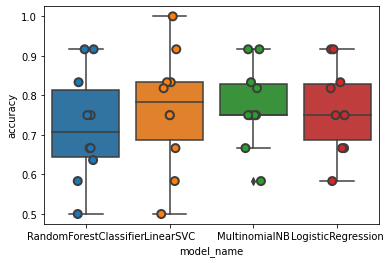

In [327]:
# training_features, test_features, training_target, test_target = train_test_split(features_nd[0:len(df['lowercase'])], y,test_size=0.3)
# x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,test_size = 0.3,random_state=12)

# sm = SMOTE(sampling_strategy='auto')
# x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

x_train, x_val, y_train, y_val = train_test_split(features, labels,test_size=0.3, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    # LDA(),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
# print(len(cv_df))
for model in models:
    model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, x_train_res, y_train_res, scoring='accuracy', cv=CV)
    accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)
    #   print(model_name)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# print(len(cv_df))
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

-1.1839996815951712 weekly 0.4948363993910898 canal
-0.7642441303579132 dec 0.46767914603940614 men
-0.6791002175225134 rab 0.43756246993517545 were
-0.6337508414876201 michigan 0.4300746015427316 suez
-0.5700451412731005 1962 0.39280224785460377 israel
-0.5549544655074501 observe 0.3850393630895872 000
-0.5427470737890693 1964 0.3668485528022536 had
-0.5035652853337602 magazine 0.3373462218030743 these
-0.4699117391424687 news 0.3351678589316867 president
-0.448379537751571 room 0.3309051365589985 walls
-0.42408222058932876 flights 0.3276823677194241 authority
-0.3985833215894046 aligned 0.32126845917824204 they
-0.3873615159378938 polaris 0.3158988942411544 would
-0.378135299676565 festival 0.2933830658366484 illuminated
-0.3759522887784768 see 0.2933830658366484 cafes
-0.3646870367548283 middle 0.2933261484177476 city
-0.35718387672404855 reading 0.2793283651700204 two
-0.34732763568656977 tel 0.2736198309429323 our
-0.3459607236581482 non 0.2629360548427999 cotton
-0.34069689492753

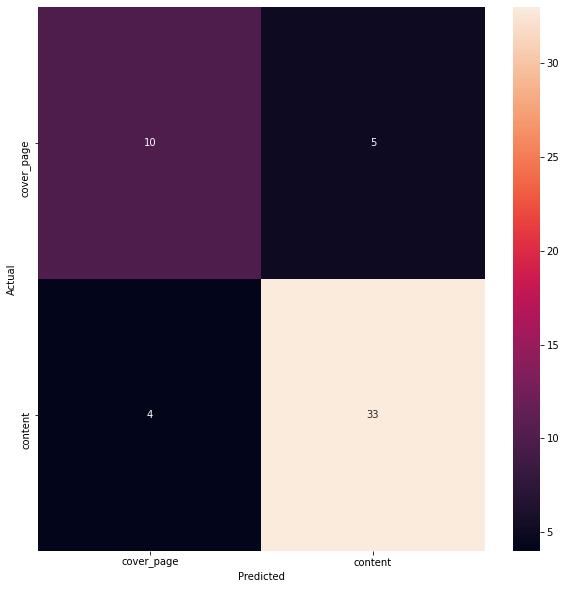

In [329]:
log_model = LogisticRegression()
log_model = log_model.fit(X=x_train, y=y_train)
# log_model = log_model.fit(X=x_train_res, y=y_train_res)

def show_most_informative_features(vectorizer, clf, n=50):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))

    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n+1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print(coef_1, fn_1, coef_2, fn_2)



show_most_informative_features(tfidf_model, log_model)
y_pred = log_model.predict(x_val)
print('Validation Results')
print(log_model.score(x_val, y_val))
print(metrics.recall_score(y_val, y_pred, average=None ))
print("Precision:",metrics.precision_score(y_val, y_pred, average=None ))
print('\nTest Results')
print(log_model.score(test_features, test_target))
print(metrics.recall_score(test_target, log_model.predict(test_features), average=None ))
print("Precision:",metrics.precision_score(test_target, log_model.predict(test_features), average=None))


kfold = KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
# results = cross_val_score(log_model, x_train_res, y_train_res,scoring='accuracy', cv=kfold)
results = cross_val_score(log_model, x_train, y_train,scoring='accuracy', cv=kfold)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

print(metrics.classification_report(y_val, y_pred, target_names=df['type_of_page'].unique()))
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_val, y_pred)
print(conf_mat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.type_of_page.values, yticklabels=category_id_df.type_of_page.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# fig.savefig('confusionmatrix_earlylatetime_weighted.png')

# print(classification_report_imbalanced(y_val,y_pred))
# tfidf_model2 = TfidfVectorizer(lowercase=False)
# features_big = tfidf_model.transform(docs_big.token_texts.tolist())

# features_nd_big = features_big.toarray()
# # # # # # # print(len(features_nd_big))

# predictions_proba = log_model.predict_proba(features_nd_big[0:len(docs_big['token_texts'])])
# # pd.DataFrame(clf.predict_proba(test), columns=clf.classes_)
# predictions_one = [x[1] for x in predictions_proba]
# predictions_zero = [x[0] for x in predictions_proba]
# predictions_big = log_model.predict(features_nd_big[0:len(docs_big['token_texts'])])



In [289]:
big_df

,index,page_number,lowercase,cleaned_nltk_counts,cleaned_nltk_text,cleaned_spacy_counts,cleaned_spacy_text,dates_x,original_counts,original_text,title,volume,issue_number,dates_y,type_of_page,date
0,0.0,1,"604,971 c",2.0,"604,971 c",1.0,c,1962_Oct-Dec,2.0,"604,971 c",arab_observer,oct_dec_1962,NaN,NaN,content,NaT
1,1.0,2,artes of property sc1entia ver1ta3,4.0,artes property sc1entia ver1ta3,2.0,artes property,1962_Oct-Dec,5.0,artes of property sc1entia ver1ta3,arab_observer,oct_dec_1962,119.0,October 1 1962,scanner_page,1962-10-01
2,2.0,8,agency by highlights kawt leading magazine mid...,14.0,agency highlights kawt leading magazine middle...,11.0,agency highlights kawt leading magazine middle...,1962_Oct-Dec,17.0,agency by highlights kawt leading magazine mid...,arab_observer,oct_dec_1962,119.0,NaN,content,NaT
3,3.0,9,"'s 's , , , , , , , , , , - - . . . . . . . . ...",90.0,'s 's 1 1 36 57139 57432 57534 ion • abroad ac...,75.0,ion abroad achieved activities advent arab ara...,1962_Oct-Dec,155.0,"'s 's , , , , , , , , , , - - . . . . . . . . ...",arab_observer,oct_dec_1962,119.0,NaN,content,NaT
4,4.0,10,"!un ( - - . . . . . . . . . . . . . . . . 1 1,...",125.0,"un 1 1,250 100 100 100/ 100/ 11,25 112,50 112/...",83.0,un africa arabia austria bahrein belgium congo...,1962_Oct-Dec,148.0,"!un ( - - . . . . . . . . . . . . . . . . 1 1,...",arab_observer,oct_dec_1962,119.0,NaN,content,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,898.0,939,"! "" ""he $ ' ' 'an 's 's ( ( ) ) , , , , , , , ...",323.0,"`` `` 'an 's 's -2,000 ... .ce 1 1,000 1955 19...",276.0,perts ntre ar abu ages agreement ahmed alive a...,1962_Jan-Jun,603.0,"! "" ""he $ ' ' 'an 's 's ( ( ) ) , , , , , , , ...",arab_observer,jan_june_1962,105.0,NaN,content,NaT
4498,899.0,940,"! ! ""nrt 's 's ( ( ( ) ) ) ) ) * *ja , , , , ,...",439.0,`` nrt 's 's ja 1945 1947 1949 1949 1952 3 32 ...,401.0,nrt ja absence acquaint acquaint africa africa...,1962_Jan-Jun,825.0,"! ! ""nrt 's 's ( ( ( ) ) ) ) ) * *ja , , , , ,...",arab_observer,jan_june_1962,105.0,NaN,content,NaT
4499,900.0,941,"( ) , , , , - . . . . . . . . . . . . . . . 11...",202.0,11 24082 30234- 36 abroad acquaint advertiseme...,170.0,abroad acquaint advertisement afforded ago app...,1962_Jan-Jun,372.0,"( ) , , , , - . . . . . . . . . . . . . . . 11...",arab_observer,jan_june_1962,105.0,NaN,content,NaT
4500,901.0,942,! & - ... 1 23 \ asr at authorized available b...,21.0,... 1 23 asr authorized available broadcasting...,18.0,asr authorized available broadcasting co deale...,1962_Jan-Jun,29.0,! & - ... 1 23 \ asr at authorized available b...,arab_observer,jan_june_1962,105.0,NaN,content,NaT


In [305]:
def classify_corpus(df, tfidf_model, log_model):
    # tfidf_model = TfidfVectorizer(lowercase=False)
    features_big = tfidf_model.transform(df.original_text.tolist())
    features_nd_big = features_big.toarray()

    predictions_proba = log_model.predict_proba(features_nd_big[0:len(df['original_text'])])
    predictions_one = [x[1] for x in predictions_proba]
    predictions_zero = [x[0] for x in predictions_proba]
    predictions_big = log_model.predict(features_nd_big[0:len(df['original_text'])])


    df['prediction_proba_0'] = predictions_zero
    df['prediction_proba_1'] = predictions_one
    df['prediction'] = predictions_big
    return df

In [308]:
classified_df = classify_corpus(big_df2, tfidf_model, log_model)

In [309]:
classified_df[classified_df.prediction == 0]

,Unnamed: 0,Unnamed: 0.1,binned,bins,cleaned_nltk_counts,cleaned_nltk_text,cleaned_spacy_counts,date,datetime,day,...,page_number,string_date,type,year,cleaned_spacy_text,date_bin,date_page,prediction_proba_0,prediction_proba_1,prediction
2,2,2,0,0.000000,124,arab observer index vol 1- no 8 august 14 1960...,100.0,1960-August-14,1960-August-14,14,...,2,1960-August-14,Collected Issues,1960,arab observer index vol august arab world arab...,1960-August-14_0,1960-August-14_2,0.520825,0.479175,0
35,35,35,0,0.000000,91,sep 19 1960 the v blaustein library middle eas...,57.0,1960-August-7,1960-August-7,7,...,0,1960-August-7,Collected Issues,1960,sep v blaustein library middle east news azine...,1960-August-7_0,1960-August-7_0,0.503106,0.496894,0
37,37,37,0,0.000000,162,arab observer index vol 1- no 7 august 7 1960 ...,120.0,1960-August-7,1960-August-7,7,...,2,1960-August-7,Collected Issues,1960,arab observer index vol august arab world leba...,1960-August-7_0,1960-August-7_2,0.512201,0.487799,0
54,54,54,0,0.000000,91,cartoons revolution against imperialism presid...,58.0,1960-August-7,1960-August-7,7,...,19,1960-August-7,Collected Issues,1960,cartoons revolution imperialism president abde...,1960-August-7_0,1960-August-7_19,0.534277,0.465723,0
73,73,73,0,0.000000,152,arab observer index vol 1- no 27 december 25 1...,125.0,1960-December-25,1960-December-25,25,...,2,1960-December-25,Collected Issues,1960,arab observer index vol december arab world fr...,1960-December-25_0,1960-December-25_2,0.549585,0.450415,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,12676,8375,0,11.972222,52,"`` , . . . 4,500 a a a ago ahmad and and at be...",29.0,1966-September-01,1966-September-01,1,...,32,1966-Sep-01,HathiTrust Volumes,1966,ago ahmad bes cape country deity discovered eg...,1966-September-01_0,1966-September-01_32,0.504351,0.495649,0
12706,12706,8405,1,11.972222,6,e g p t visit y,4.0,1966-September-01,1966-September-01,1,...,65,1966-Sep-01,HathiTrust Volumes,1966,e g p visit,1966-September-01_1,1966-September-01_65,0.503970,0.496030,0
12749,12749,8448,2,11.972222,3,16 arab observer,2.0,1966-September-01,1966-September-01,1,...,108,1966-Sep-01,HathiTrust Volumes,1966,arab observer,1966-September-01_2,1966-September-01_108,0.505458,0.494542,0
12759,12759,8458,2,11.972222,5,^t/ta and arab observer settle,4.0,1966-September-01,1966-September-01,1,...,119,1966-Sep-01,HathiTrust Volumes,1966,ta arab observer settle,1966-September-01_2,1966-September-01_119,0.505534,0.494466,0


In [324]:
sizes = covers.issue_size.unique().tolist()
sizes

[36.0, 44.0, 48.0, 46.0, 68.0, 56.0, 58.0, 62.0, 54.0, 60.0, 80.0]

In [312]:
classified_df.sort_values(by=['date', 'page_number'], inplace=True)

In [335]:
classified_df['token_len'] = classified_df.original_text.apply(word_tokenize)

In [333]:
def get_issue_size(rows):
    issue_len = len(rows)
    if issue_len < 100:
        pass
    else:
        for size in sizes:
            for idx in range(0, issue_len, int(size)):
                if rows[idx:idx+1].prediction_proba_0.values > 0.5:
                    print(rows[idx:idx+1].prediction_proba_0.values, rows[idx:idx+1].page_number.values, size, rows[idx:idx+1].original_text)
            
        
classified_df.groupby('date').apply(get_issue_size)

[0.53029255] [581] 46.0 4853    ^ carab president republic sallal the united v...
Name: original_text, dtype: object
[0.66933213] [631] 46.0 4899    ( . . . . 0 10 20 707 : :2<ig ? a a3 air-india...
Name: original_text, dtype: object
[0.72335264] [289] 68.0 4573    % ( ) , 10 11 1963 1bserver 480-uar 6 :f; \rab...
Name: original_text, dtype: object
[0.55925988] [63] 54.0 4355    ? bseryer doing exper he non-aligned weekly wh...
Name: original_text, dtype: object
[0.5081063] [287] 54.0 4571    & , ,4c . 70648-46601-70156 ^tuesday airways a...
Name: original_text, dtype: object
[0.50507831] [513] 54.0 4787    " % % ) , , , , ,377,525 . . . . . . . . . . ....
Name: original_text, dtype: object
[0.51694044] [298] 36.0 5292    , . africa agency and arabe by documentary doc...
Name: original_text, dtype: object
[0.52203853] [182] 44.0 5180    " , , - . . . agency al arab cairo easa east e...
Name: original_text, dtype: object
[0.65248643] [637] 44.0 5620    ! , / 144 4 : abdel arab architect

""
